In [1]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker
import warnings

In [2]:
df = pd.read_csv("train.csv")
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [3]:
df.describe()


Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000

In [4]:
#sort formats for all dates 
df.drop('Row ID',axis = 1, inplace = True) #Dropping the Row ID column
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y') #convert Order dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')   #convert shipping dates to pandas datetime format
df['Month_order'] = df['Order Date'].dt.to_period('M')
df['Year_order'] = df['Order Date'].dt.to_period('Y')

In [5]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

In [6]:
#setting the index to be the date
df.set_index("Order Date", inplace = True)

In [7]:
#check null vals 
print(df.isnull().sum())

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Month_order       0
Year_order        0
dtype: int64


In [8]:
df[df['Postal Code'].isnull()]

Order ID  Ship Date       Ship Mode Customer ID  \
Order Date                                                          
2016-11-07  CA-2016-162887 2016-11-09    Second Class    SV-20785   
2016-11-08  CA-2016-117086 2016-11-12  Standard Class    QJ-19255   
2017-01-23  US-2017-165505 2017-01-27  Standard Class    CB-12535   
2017-01-23  US-2017-165505 2017-01-27  Standard Class    CB-12535   
2017-01-23  US-2017-165505 2017-01-27  Standard Class    CB-12535   
2017-04-06  US-2017-150140 2017-04-10  Standard Class    VM-21685   
2018-01-19  US-2018-127292 2018-01-23  Standard Class    RM-19375   
2018-01-19  US-2018-127292 2018-01-23  Standard Class    RM-19375   
2018-01-19  US-2018-127292 2018-01-23  Standard Class    RM-19375   
2018-01-19  US-2018-127292 2018-01-23  Standard Class    RM-19375   
2018-12-05  CA-2018-104066 2018-12-10  Standard Class    QJ-19255   

               Customer Name      Segment        Country        City    State  \
Order Date                                                                      
2016-11-07  Stewart Visinsky     Consumer  United States  Burlington  Vermont   
2016-11-08      Quincy Jones    Corporate  United States  Burlington  Vermont   
2017-01-23  Claudia Bergmann    Corporate  United States  Burlington  Vermont   
2017-01-23  Claudia Bergmann    Corporate  United States  Burlington  Vermont   
2017-01-23  Claudia Bergmann    Corporate  United States  Burlington  Vermont   
2017-04-06   Valerie Mitchum  Home Office  United States  Burlington  Vermont   
2018-01-19     Raymond Messe     Consumer  United States  Burlington  Vermont   
2018-01-19     Raymond Messe     Consumer  United States  Burlington  Vermont   
2018-01-19     Raymond Messe     Consumer  United States  Burlington  Vermont   
2018-01-19     Raymond Messe     Consumer  United States  Burlington  Vermont   
2018-12-05      Quincy Jones    Corporate  United States  Burlington  Vermont   

            Postal Code Region       Product ID         Category Sub-Category  \
Order Date                                                                      
2016-11-07          NaN   East  FUR-CH-10000595        Furniture       Chairs   
2016-11-08          NaN   East  FUR-BO-10004834        Furniture    Bookcases   
2017-01-23          NaN   East  TEC-AC-10002926       Technology  Accessories   
2017-01-23          NaN   East  OFF-ST-10001526  Office Supplies      Storage   
2017-01-23          NaN   East  OFF-AR-10003477  Office Supplies          Art   
2017-04-06          NaN   East  TEC-PH-10002555       Technology       Phones   
2018-01-19          NaN   East  OFF-AP-10000828  Office Supplies   Appliances   
2018-01-19          NaN   East  OFF-EN-10001509  Office Supplies    Envelopes   
2018-01-19          NaN   East  OFF-PA-10001970  Office Supplies        Paper   
2018-01-19          NaN   East  OFF-PA-10000157  Office Supplies        Paper   
2018-12-05          NaN   East  TEC-AC-10001013       Technology  Accessories   

                                                 Product Name    Sales  \
Order Date                                                               
2016-11-07                    Safco Contoured Stacking Chairs   715.20   
2016-11-08  Riverside Palais Royal Lawyers Bookcase, Royal...  4404.90   
2017-01-23              Logitech Wireless Marathon Mouse M705    99.98   
2017-01-23              Iceberg Mobile Mega Data/Printer Cart  1564.29   
2017-01-23                                  4009 Highlighters     8.04   
2017-04-06                Nortel Meridian M5316 Digital phone  1294.75   
2018-01-19                    Avanti 4.4 Cu. Ft. Refrigerator   542.94   
2018-01-19                          Poly String Tie Envelopes     2.04   
2018-01-19                                         Xerox 1881    12.28   
2018-01-19                                          Xerox 191    79.92   
2018-12-05        Logitech ClearChat Comfort/USB Headset H390   205.03   

           Month_order Year_order  
Order Date   

In [9]:
df['Postal Code'] = df['Postal Code'].fillna(5401) #postal code for burlington city bc all records of burlington city has missing postal 

In [10]:
#check again
print(df.isnull().sum())


Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Month_order      0
Year_order       0
dtype: int64


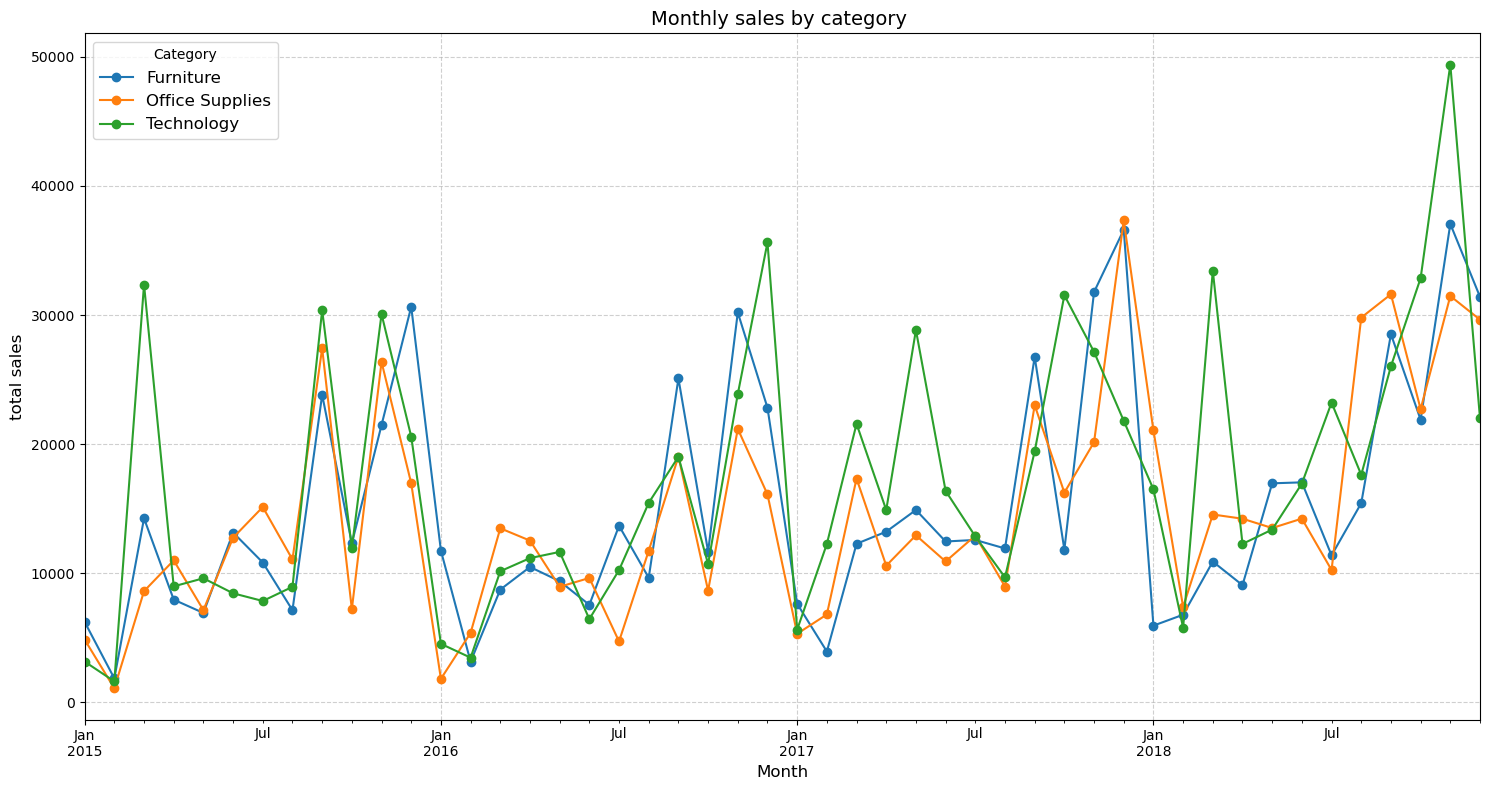

In [11]:
# month sales analysis
monthSalesByCategory = df.groupby(["Month_order", "Category"])["Sales"].sum().unstack()


monthSalesByCategory.plot(kind="line", marker="o", figsize=(15, 8))
plt.title("Monthly sales by category ", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("total sales", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Category", fontsize=12)
plt.tight_layout()

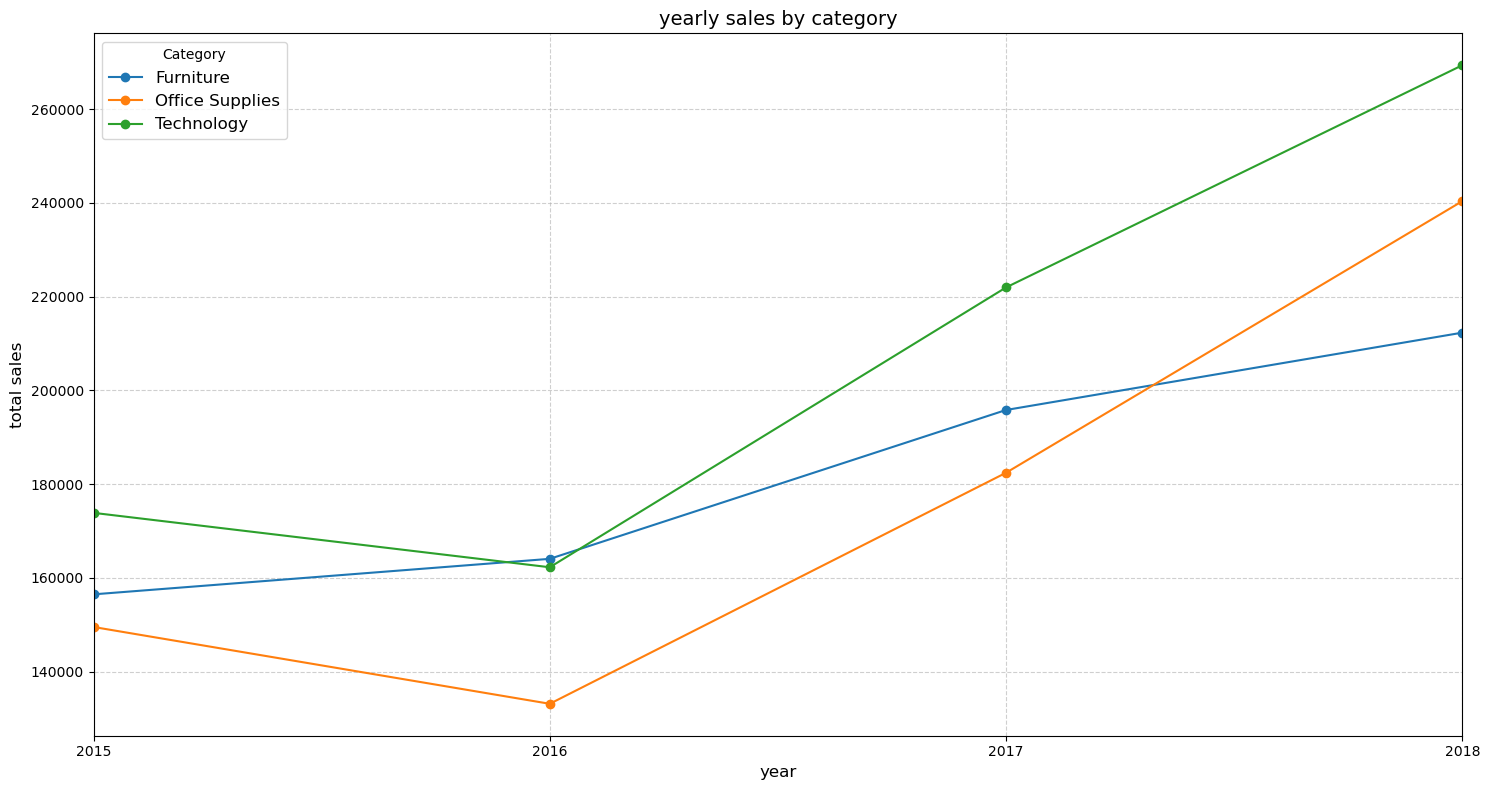

In [12]:
# 4 year sales analysis
yearlyOrder = df.groupby(["Year_order", "Category"])["Sales"].sum().unstack()

yearlyOrder.plot(kind="line", marker="o", figsize=(15, 8))
plt.title("yearly sales by category", fontsize=14)
plt.xlabel("year", fontsize=12)
plt.ylabel("total sales", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Category", fontsize=12)
plt.tight_layout()

In [13]:
# Group by category and sum sales, then sort
Top_category = df.groupby("Category")["Sales"].sum().reset_index().sort_values("Sales", ascending=False)

# Find total revenue generated across all categories
total_revenue_category = Top_category["Sales"].sum()

# Convert the total revenue to an integer, then string, then add '$' sign
total_revenue_category = f"${int(total_revenue_category)}"

print("Total Revenue per Category:", total_revenue_category)

# Display the processed dataframe
print(Top_category)


Total Revenue per Category: $2261536
          Category        Sales
2       Technology  827455.8730
0        Furniture  728658.5757
1  Office Supplies  705422.3340


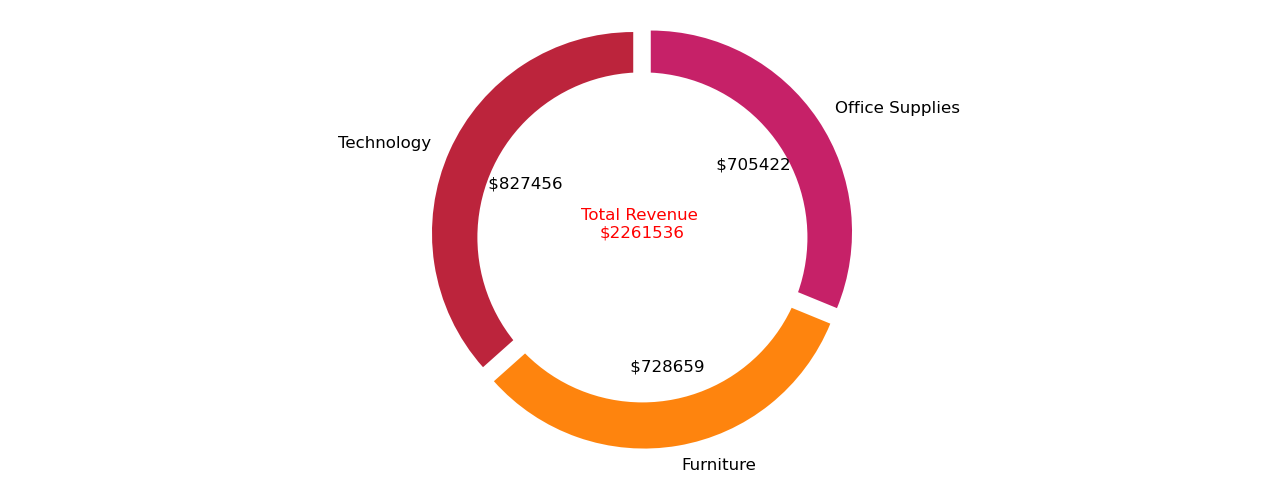

In [14]:
# pie chart for top 3 cat
plt.rcParams["figure.figsize"] = (13,5) # width and height of figure is defined in inches
plt.rcParams['font.size'] = 12.0 # Font size is defined
plt.rcParams['font.weight'] = 6 # Font weight is defined
# we don't want to look at the percentage distribution in the pie chart. Instead, we want to look at the exact revenue generated by the categories.
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format
colors = ['#BC243C','#FE840E','#C62168'] # Colors are defined for the pie chart
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], autopct= autopct_format(Top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') # drawing a circle on the pie chart to make it look better 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) # Add the circle on the pie chart
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
# we can look the total revenue generated by all the categories at the center
label = ax1.annotate('Total Revenue \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=12, ha="center")
plt.tight_layout()
plt.show()

In [15]:
# Sort both category and sub-category as per sales
Top_subcat = df.groupby(["Category", "Sub-Category"])["Sales"].sum().reset_index()
Top_subcat = Top_subcat.sort_values("Sales", ascending=False).head(10)  # Sort and get top 10

# Cast Sales column to integer data type
Top_subcat["Sales"] = Top_subcat["Sales"].astype(int)

# Sort values by Category
Top_subcat = Top_subcat.sort_values("Category")

# Reset index
Top_subcat.reset_index(drop=True, inplace=True)

# Calculate the total sales of all categories
Top_subcat_1 = Top_subcat.groupby("Category")["Sales"].sum().reset_index()

# Display the processed dataframe
print(Top_subcat)
print(Top_subcat_1)


          Category Sub-Category   Sales
0        Furniture       Chairs  322822
1        Furniture       Tables  202810
2        Furniture    Bookcases  113813
3  Office Supplies      Storage  219343
4  Office Supplies      Binders  200028
5  Office Supplies   Appliances  104618
6       Technology       Phones  327782
7       Technology     Machines  189238
8       Technology  Accessories  164186
9       Technology      Copiers  146248
          Category   Sales
0        Furniture  639445
1  Office Supplies  523989
2       Technology  827454


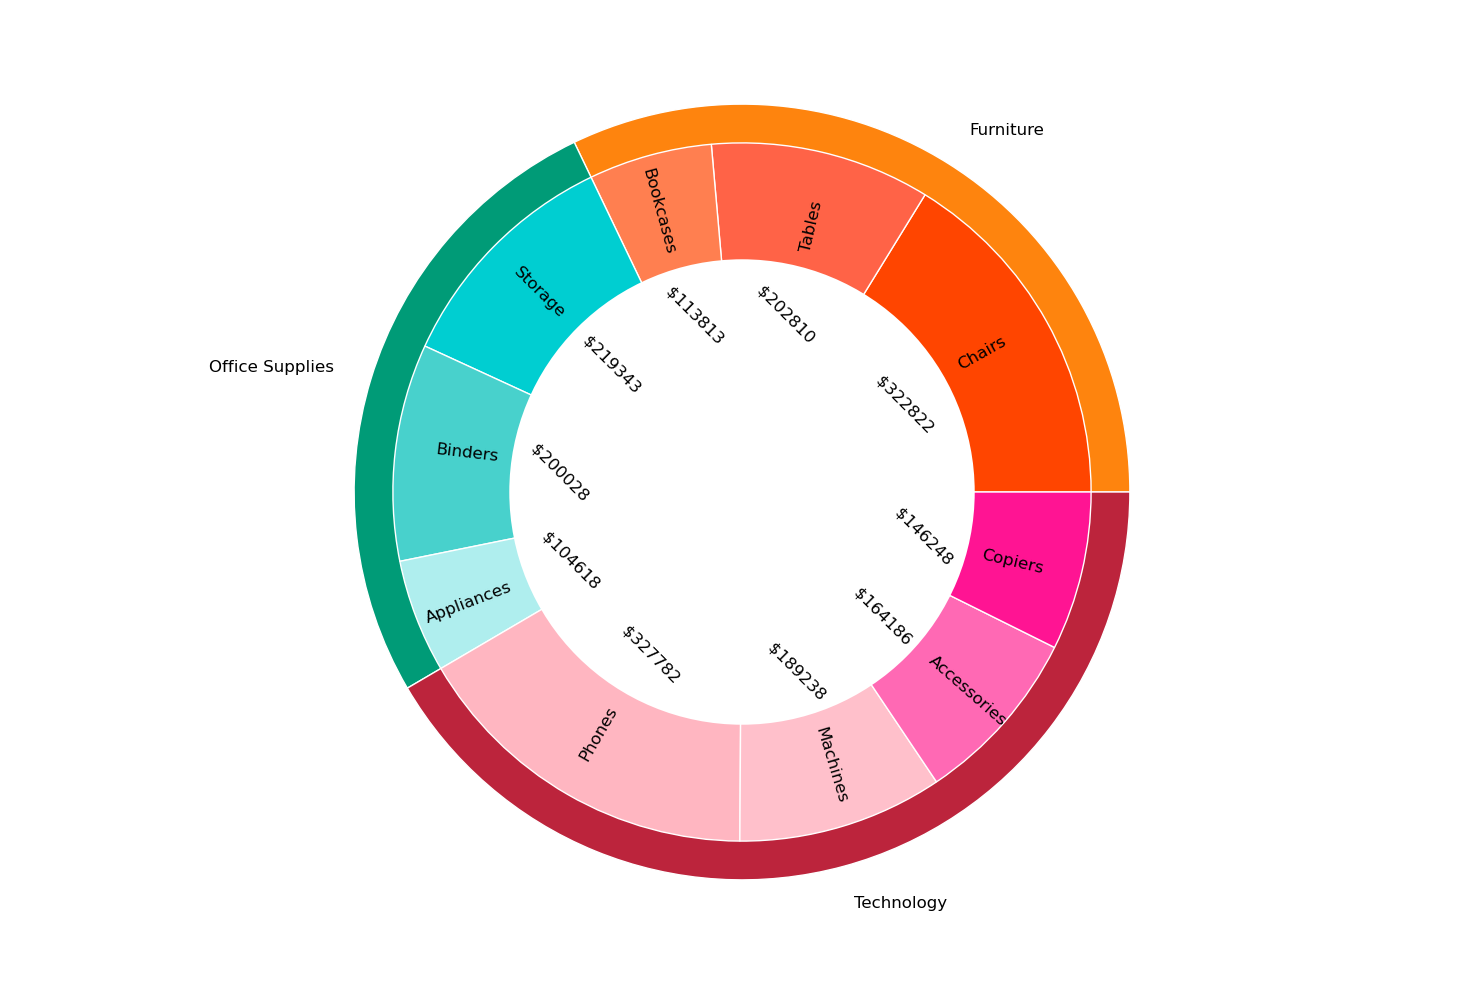

In [16]:
plt.rcParams["figure.figsize"] = (15,10) # width and height of figure is defined in inches
fig, ax = plt.subplots()
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
width = 0.1
outer_colors = ['#FE840E','#009B77','#BC243C'] # Outer colors of the pie chart
inner_colors = ['Orangered','tomato','coral',"darkturquoise","mediumturquoise","paleturquoise","lightpink","pink","hotpink","deeppink"] # inner colors of the pie chart
pie = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],autopct= autopct_format(Top_subcat['Sales']),labeldistance=0.7,colors=inner_colors,wedgeprops=dict(edgecolor='w'), pctdistance=0.53,rotatelabels =True)
# Rotate fractions
# [0] = wedges, [1] = labels, [2] = fractions
fraction_text_list = pie2[2]
for text in fraction_text_list: 
    text.set_rotation(315) # rotate the autopct values
centre_circle = plt.Circle((0,0),0.6,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()


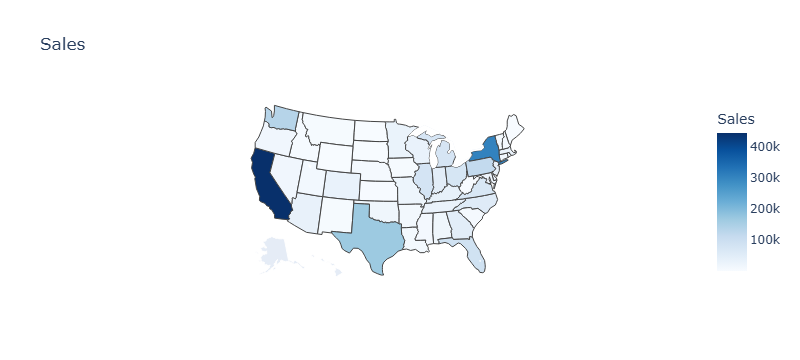

In [17]:
import pandas as pd
import plotly.graph_objects as go

# Define state and state_code lists
state = ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
         'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 
         'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 
         'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
         'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD',
              'TN','TX','UT','VT','VA','WA','WV','WI','WY']

# Create a DataFrame for states and their codes
state_df = pd.DataFrame({'State Code': state_code, 'State': state})

numeric_columns = df.select_dtypes(include=['number']).columns
sales = df.groupby("State")[numeric_columns].sum().sort_values("Sales", ascending=False)

# Reset index to make "State" a column
sales.reset_index(inplace=True)

# Drop "Postal Code" safely using axis=1
if 'Postal Code' in sales.columns:
    sales.drop('Postal Code', axis=1, inplace=True)

# Sort by "State"
sales = sales.sort_values('State', ascending=True).reset_index(drop=True)

# Merge sales with state codes
sales = sales.merge(state_df, on="State", how="left")

# Add text labels
sales['text'] = sales['State'] + '<br>Sales: ' + sales['Sales'].astype(str)

# Create the Choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'],  # Spatial coordinates
    text=sales['text'],
    z=sales['Sales'].astype(float),  # Data to be color-coded
    locationmode='USA-states',  # Set of locations match entries in `locations`
    colorscale='Blues',
    colorbar_title="Sales",
))

fig.update_layout(
    title_text='Sales',
    geo_scope='usa',  # Limit map scope to USA
)

fig.show()


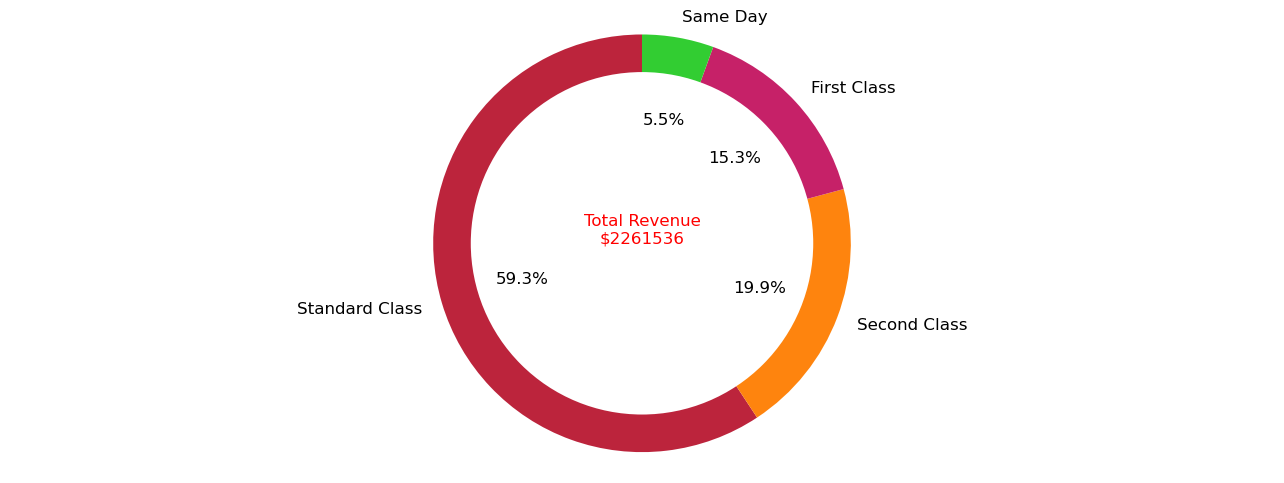

In [18]:
# Which shipping mode has the highest sales?
# Group by "Ship Mode" and sum only numeric columns
Top_shipping = df.groupby(["Ship Mode"]).sum(numeric_only=True).sort_values("Sales", ascending=False)

# Keep only the "Sales" column
Top_shipping = Top_shipping[["Sales"]]

# Reset index to add "Ship Mode" back as a column
Top_shipping.reset_index(inplace=True)

# Compute total revenue
total_revenue_ship = Top_shipping["Sales"].sum()
total_revenue_ship = f"${int(total_revenue_ship)}"  # Convert to integer and format as a string with "$"

# Pie Chart Configurations
plt.rcParams["figure.figsize"] = (13, 5)  # Define figure size
plt.rcParams['font.size'] = 12  # Font size
plt.rcParams['font.weight'] = 6  # Font weight
colors = ['#BC243C', '#FE840E', '#C62168', "limegreen"]  # Define pie chart colors

# Create pie chart
fig1, ax1 = plt.subplots()
ax1.pie(Top_shipping['Sales'], colors=colors, labels=Top_shipping['Ship Mode'], autopct='%1.1f%%', startangle=90)

# Add a center circle to create a donut chart effect
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures the pie is drawn as a circle
ax1.axis('equal')

# Annotate total revenue at the center of the chart
ax1.annotate(f'Total Revenue\n{total_revenue_ship}', color='red', xy=(0, 0), fontsize=12, ha="center")

# Adjust layout and display chart
plt.tight_layout()
plt.show()

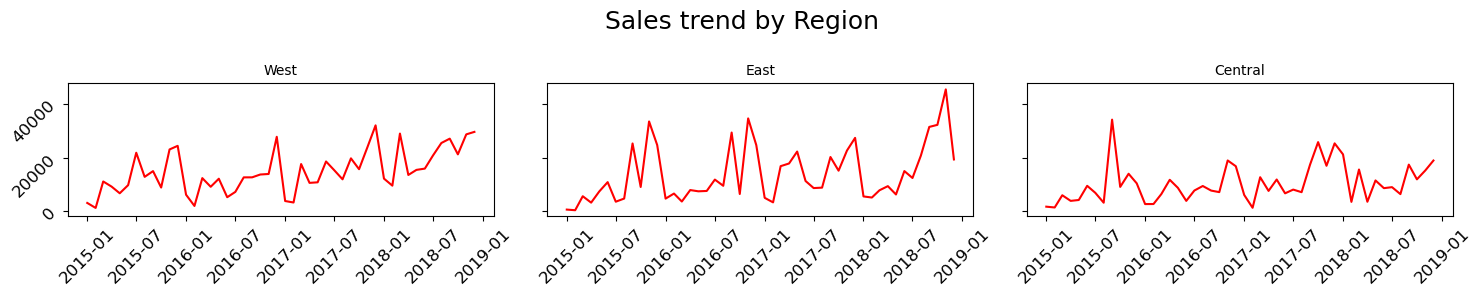

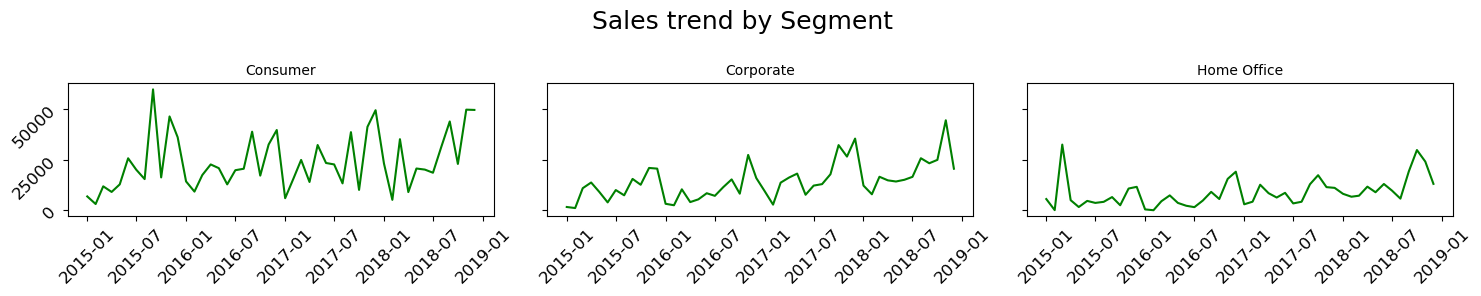

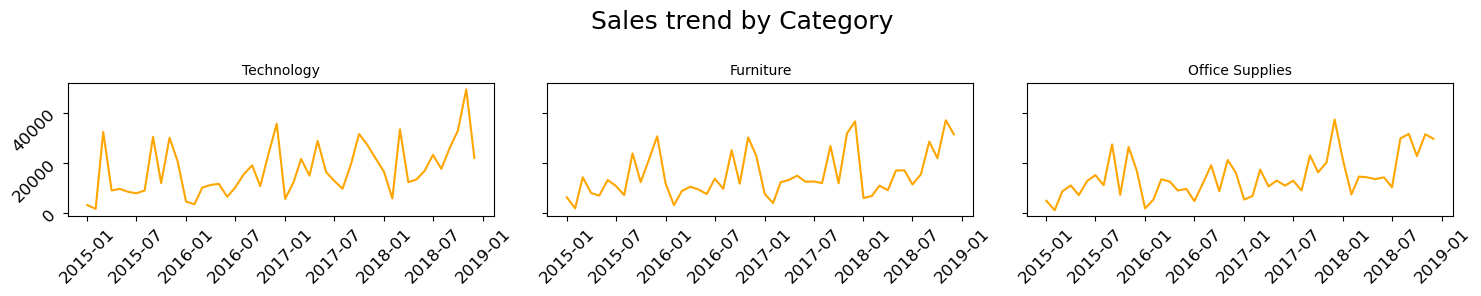

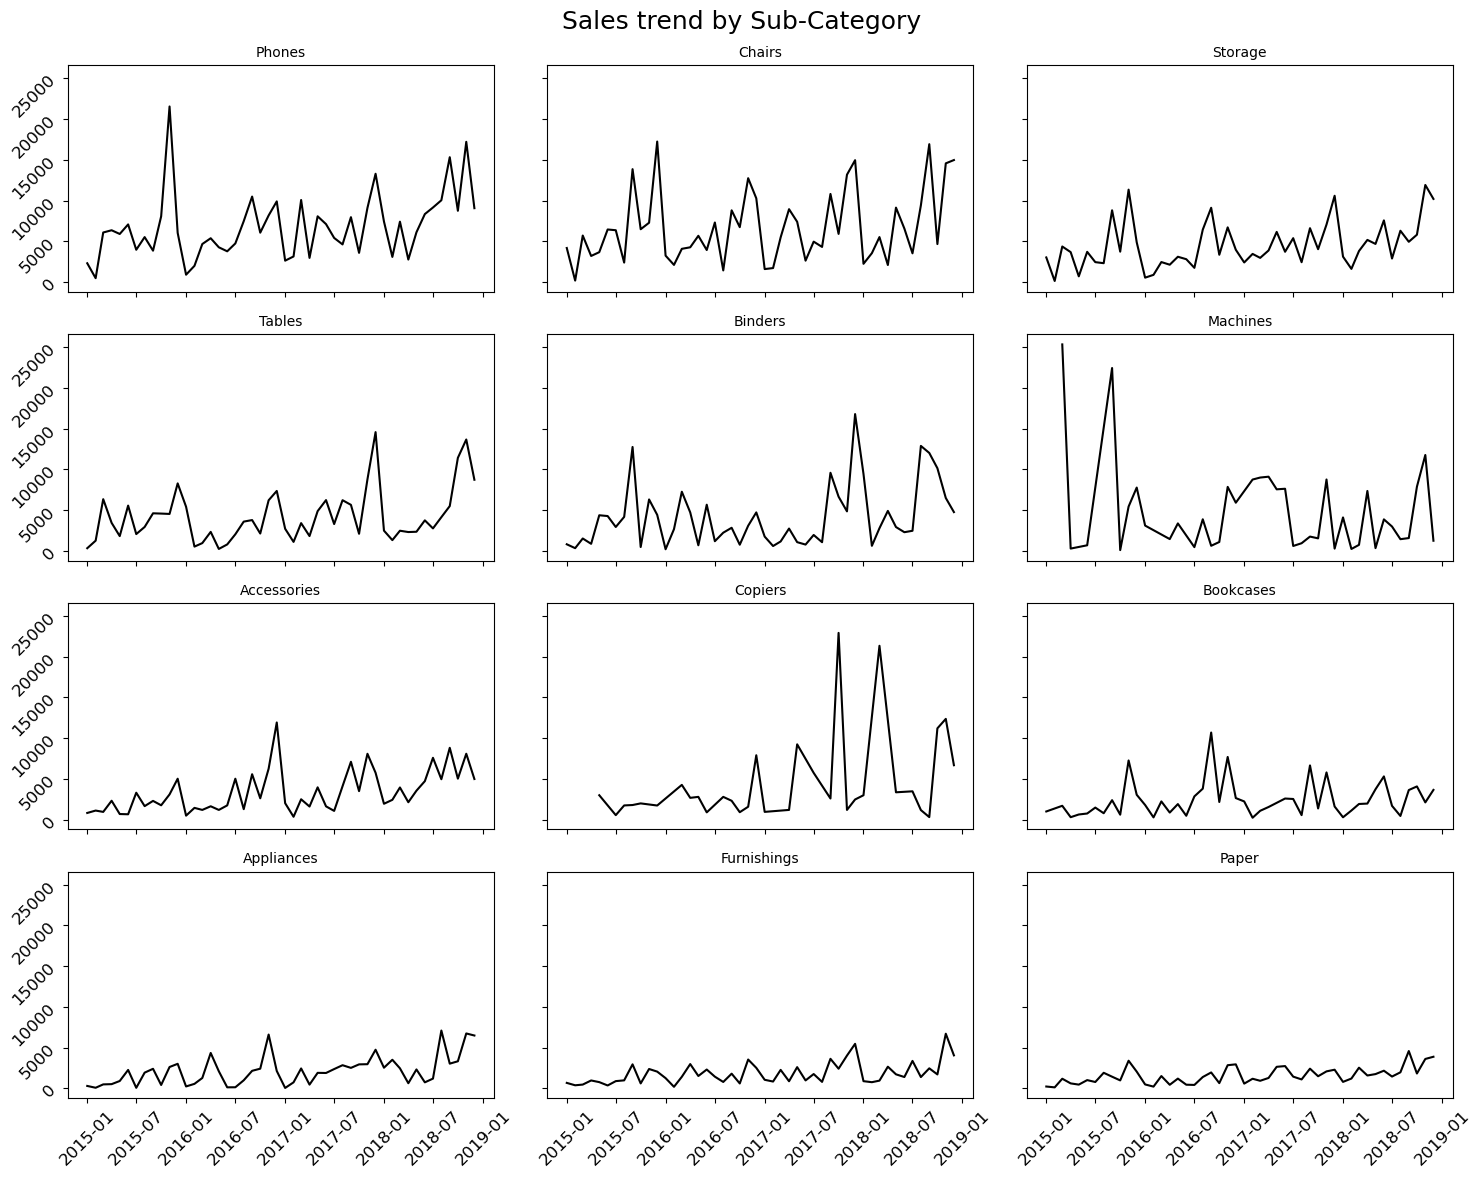

In [19]:
# this function is to plot trend per selected feature
def plot_trend_group(group,size, color='blue'):
    sales_by_group = df.groupby(group)['Sales'].sum() # group sales by group
    sales_by_group.sort_values(ascending= False, inplace=True) # sort values
    sales_by_group.head(size) # select top records
    # subplots with 3 plots per line
    fig, axes = plt.subplots(int(size/3),3, figsize=(15,size), sharex =True, sharey =True)
    fig.suptitle('Sales trend by {}'.format(group), fontsize=18)
    # loop over selected groups in a feature
    for ax,group_name in zip(axes.flat, sales_by_group.index):
        sales_group = df[df[group]==group_name]
        sales_group = sales_group.groupby("Month_order")['Sales'].sum()
        sales_group.index = sales_group.index.to_timestamp()
        ax.tick_params(labelrotation=45)
        ax.set_title(group_name, fontsize = 10)
        ax.plot(sales_group, color=color)
    fig.tight_layout()
plot_trend_group('Region',3, 'red') # trend per region
plot_trend_group('Segment',3,'green') # trend per segment
plot_trend_group('Category',3, 'orange') # trend per Category
plot_trend_group('Sub-Category',12, 'black') # trend per Sub-Category


In [20]:
monthly_sales = df.groupby("Month_order")['Sales'].sum()
monthly_sales = pd.DataFrame(monthly_sales)
monthly_sales['time'] = np.arange(len(monthly_sales.index))
monthly_sales.head()

Sales  time
Month_order                 
2015-01      14205.707     0
2015-02       4519.892     1
2015-03      55205.797     2
2015-04      27906.855     3
2015-05      23644.303     4

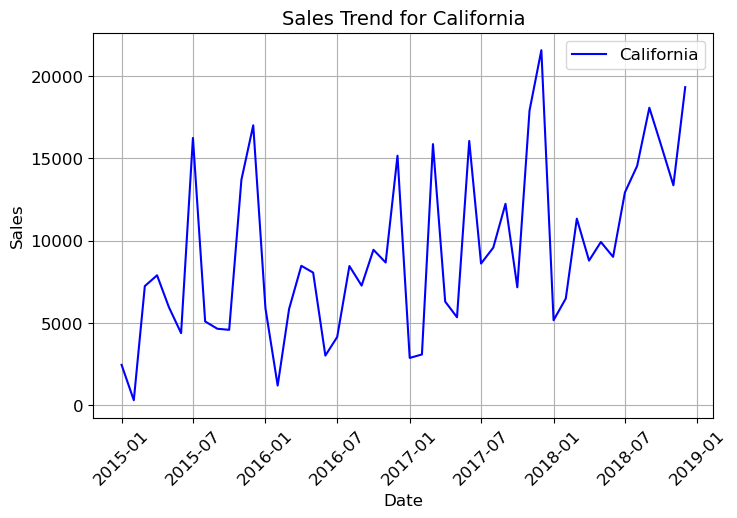

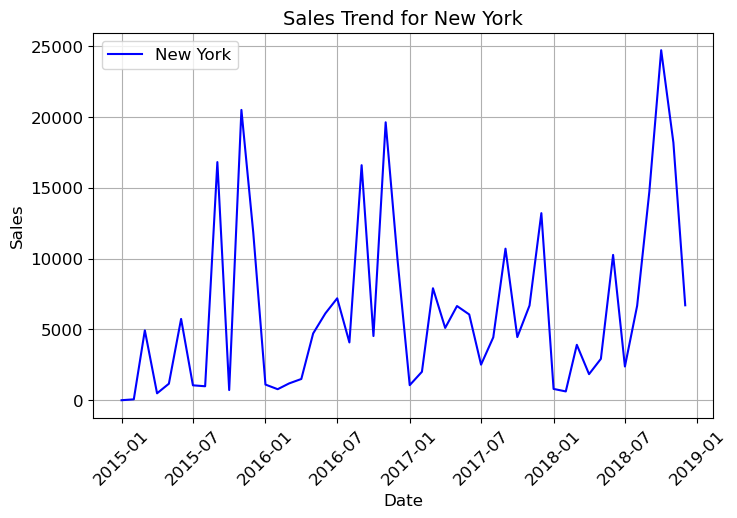

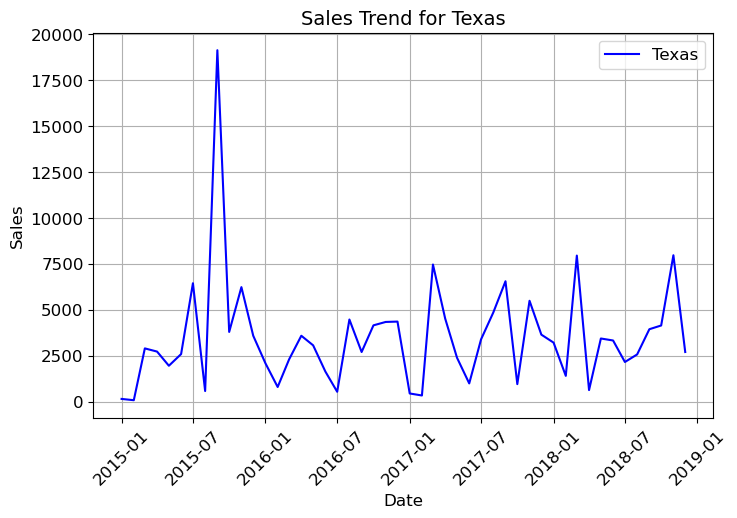

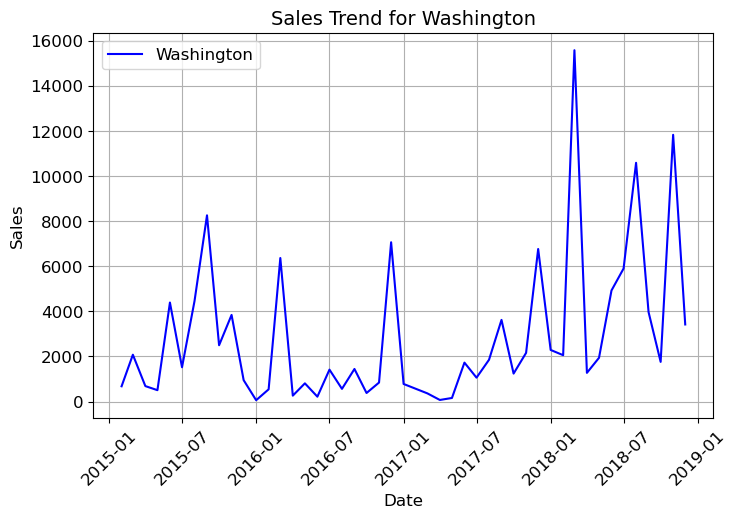

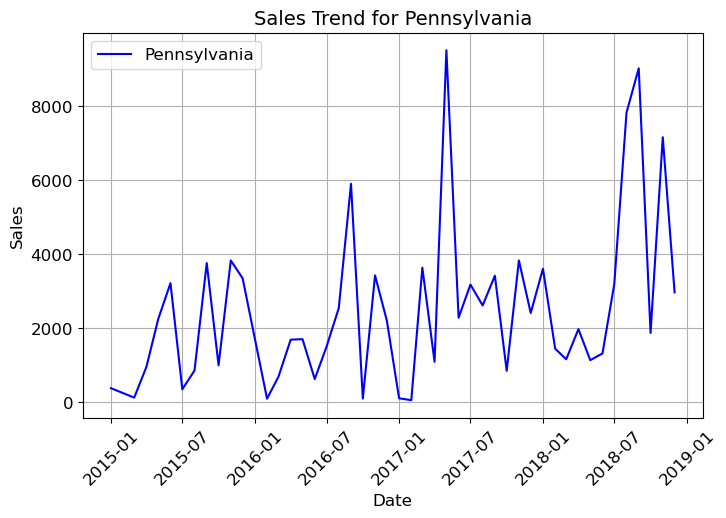

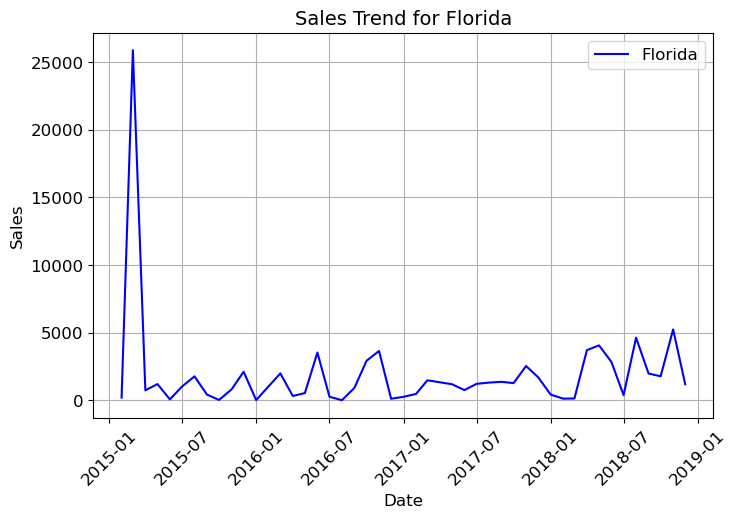

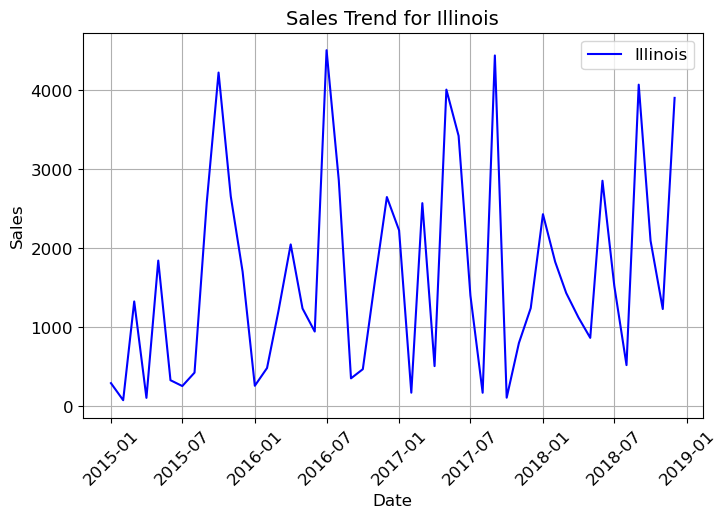

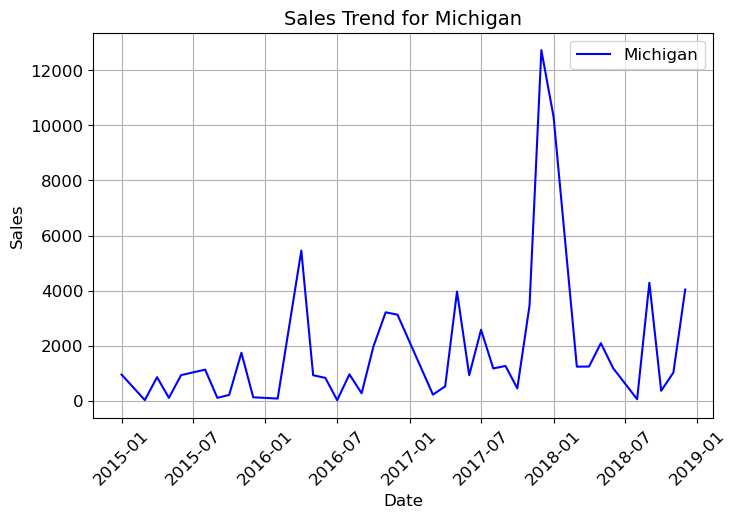

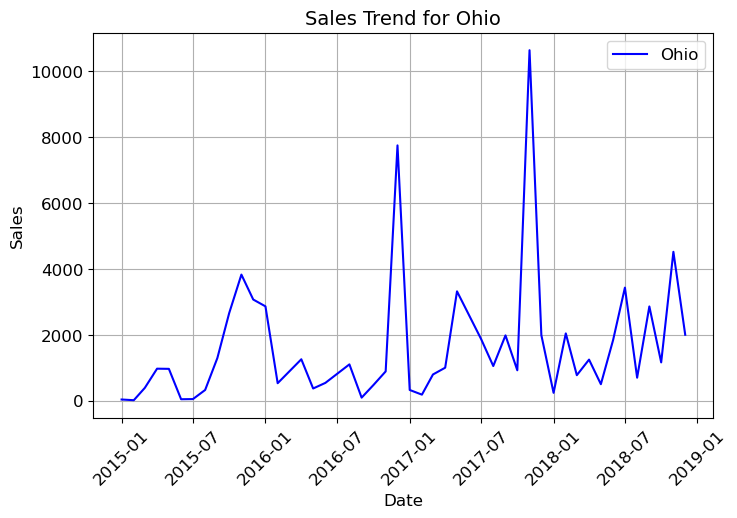

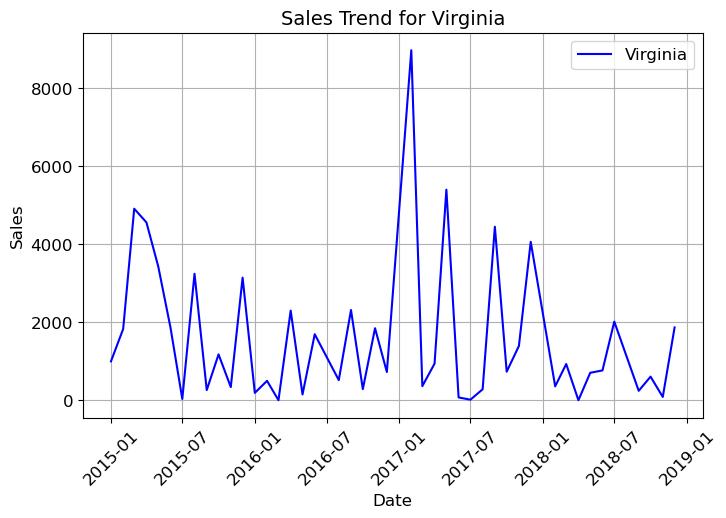

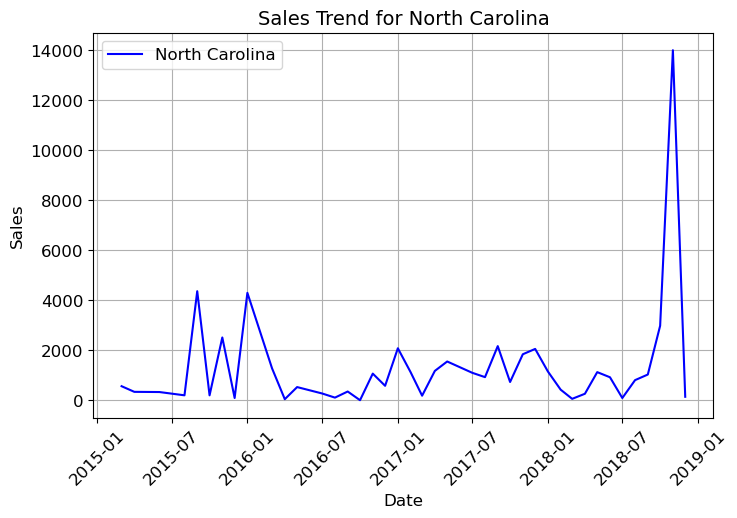

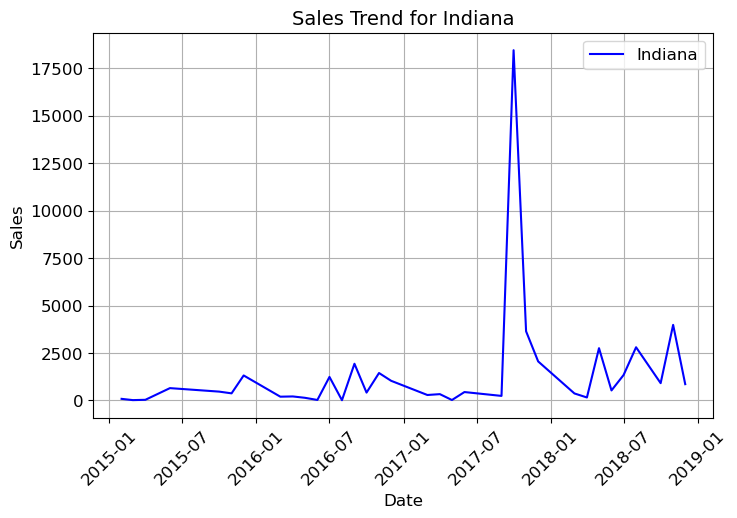

In [21]:
def plot_trend_per_state(size=12, color='blue'):
    sales_by_state = df.groupby('State')['Sales'].sum()  # Group sales by state
    sales_by_state.sort_values(ascending=False, inplace=True)  # Sort by sales
    top_states = sales_by_state.head(size).index  # Get the top 'size' states

    # Loop over each state and create separate plots
    for state in top_states:
        state_sales = df[df['State'] == state]
        state_sales = state_sales.groupby("Month_order")['Sales'].sum()  # Group by month
        state_sales.index = state_sales.index.to_timestamp()  # Convert to datetime
        
        plt.figure(figsize=(8, 5))  # Create a new figure for each state
        plt.plot(state_sales, color=color, label=state)
        plt.title(f'Sales Trend for {state}', fontsize=14)
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid(True)

        # Show the plot (or save it if needed)
        plt.show()
        # plt.savefig(f"sales_trend_{state}.png")  # Uncomment to save each plot

# Call function to generate separate graphs for each state
plot_trend_per_state()


In [22]:
import pandas as pd

df = pd.read_csv("train.csv")
print("Columns in dataset:", df.columns)  # Check actual column names


Columns in dataset: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')


Columns in the dataset: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')
Shape of grouped data: (2839, 3)


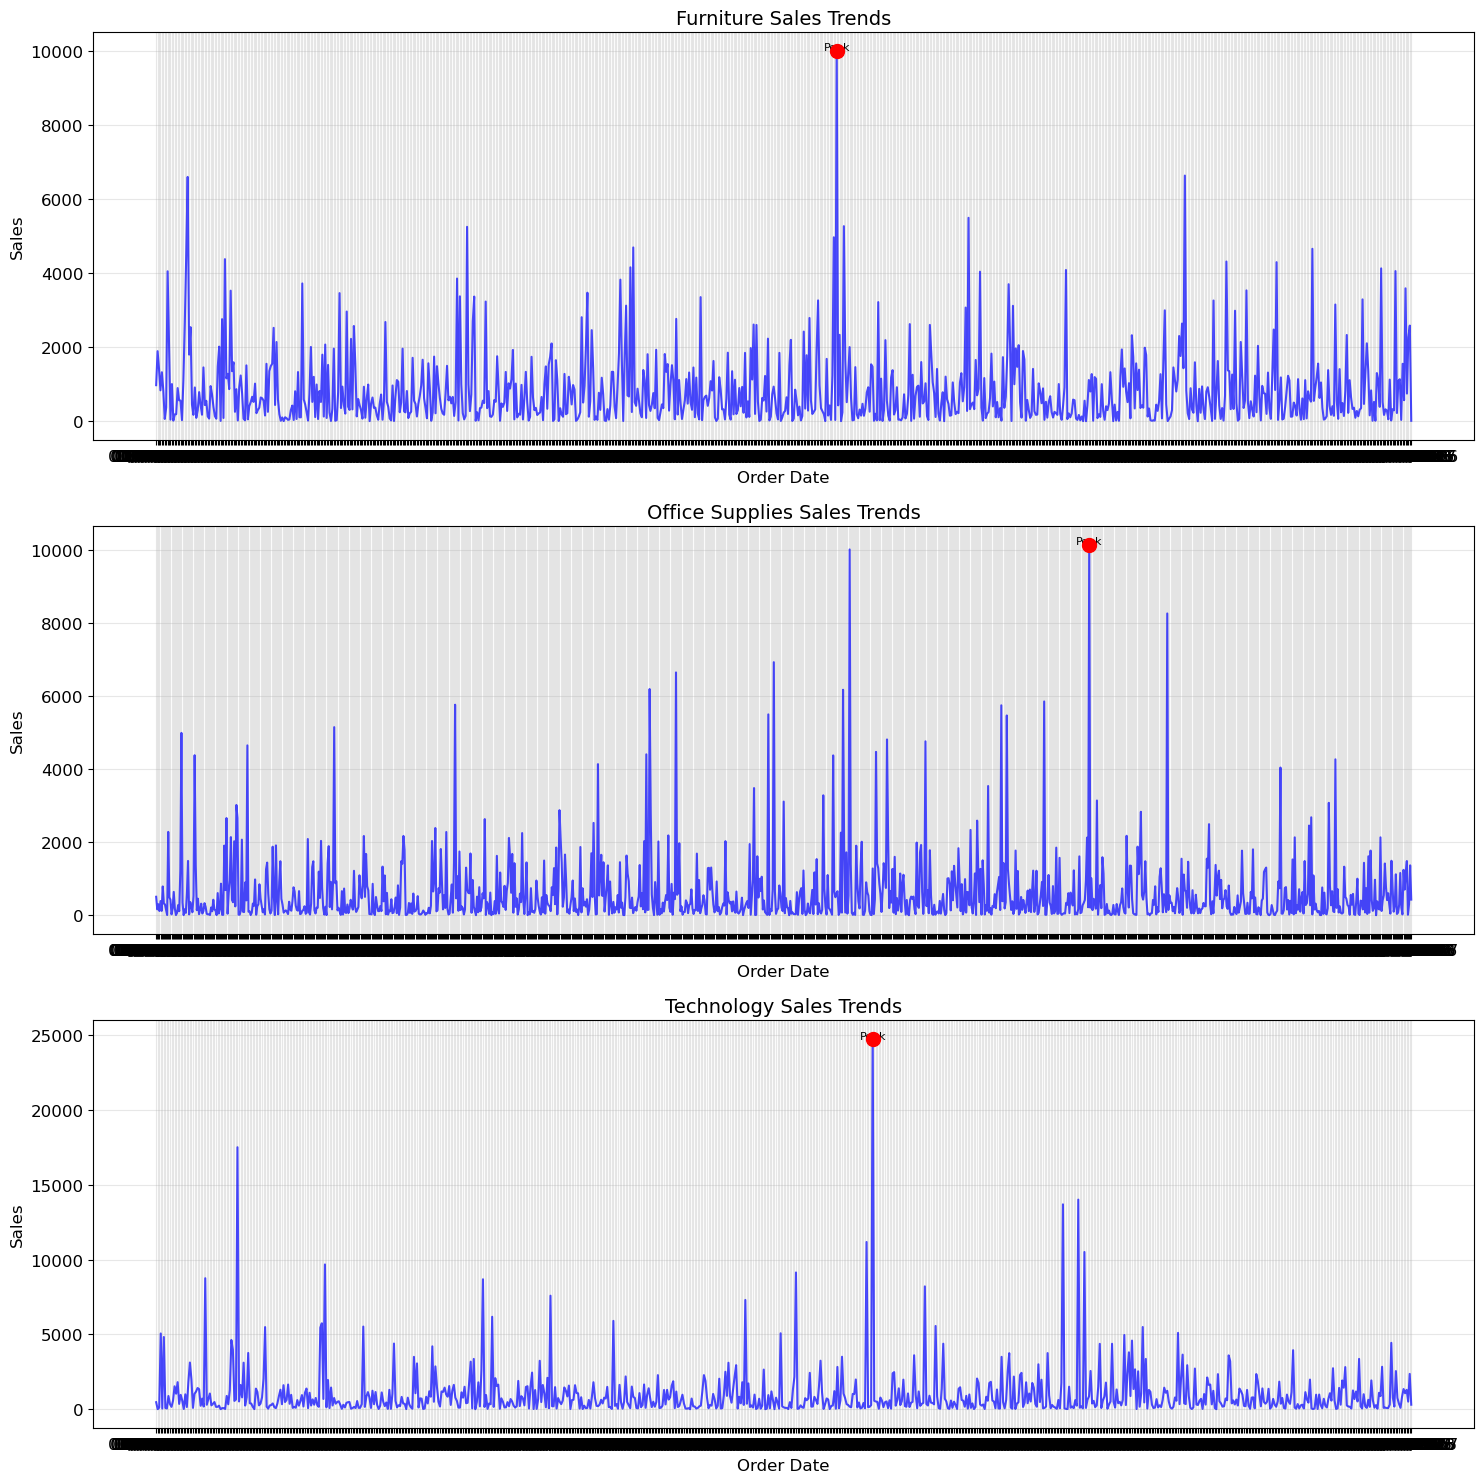


Trends data saved to 'category_trends.csv'


In [23]:


# Inspect column names
print("Columns in the dataset:", df.columns)

# Group data by Category and Order Date
grouped_data = df.groupby(['Category', 'Order Date']).agg({
    'Sales': 'sum'
}).reset_index()

# Debugging: Check grouped data shape
print("Shape of grouped data:", grouped_data.shape)

# Step 2: Generate Line Graphs for Each Category
categories = grouped_data['Category'].unique()

plt.figure(figsize=(15, len(categories) * 5))  # Adjust figure size based on number of categories

for i, category in enumerate(categories, 1):
    # Filter data for the current category
    category_data = grouped_data[grouped_data['Category'] == category]
    
    # Plot line graph for Sales over time
    plt.subplot(len(categories), 1, i)
    plt.plot(category_data['Order Date'], category_data['Sales'], label=category, color='blue', alpha=0.7)
    
    # Highlight peaks (top 3 sales values)
    peak_date = category_data.loc[category_data['Sales'].idxmax(), 'Order Date']
    peak_sales = category_data['Sales'].max()
    plt.scatter(peak_date, peak_sales, color='red', s=100, zorder=5)
    plt.text(peak_date, peak_sales + 10, f"Peak", fontsize=8, ha='center')
    
    plt.title(f"{category} Sales Trends", fontsize=14)
    plt.xlabel("Order Date", fontsize=12)
    plt.ylabel("Sales", fontsize=12)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Step 3: Optional - Save Results
grouped_data.to_csv("category_trends.csv", index=False)
print("\nTrends data saved to 'category_trends.csv'")

Columns in the dataset: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')
Shape of grouped data: (6480, 4)


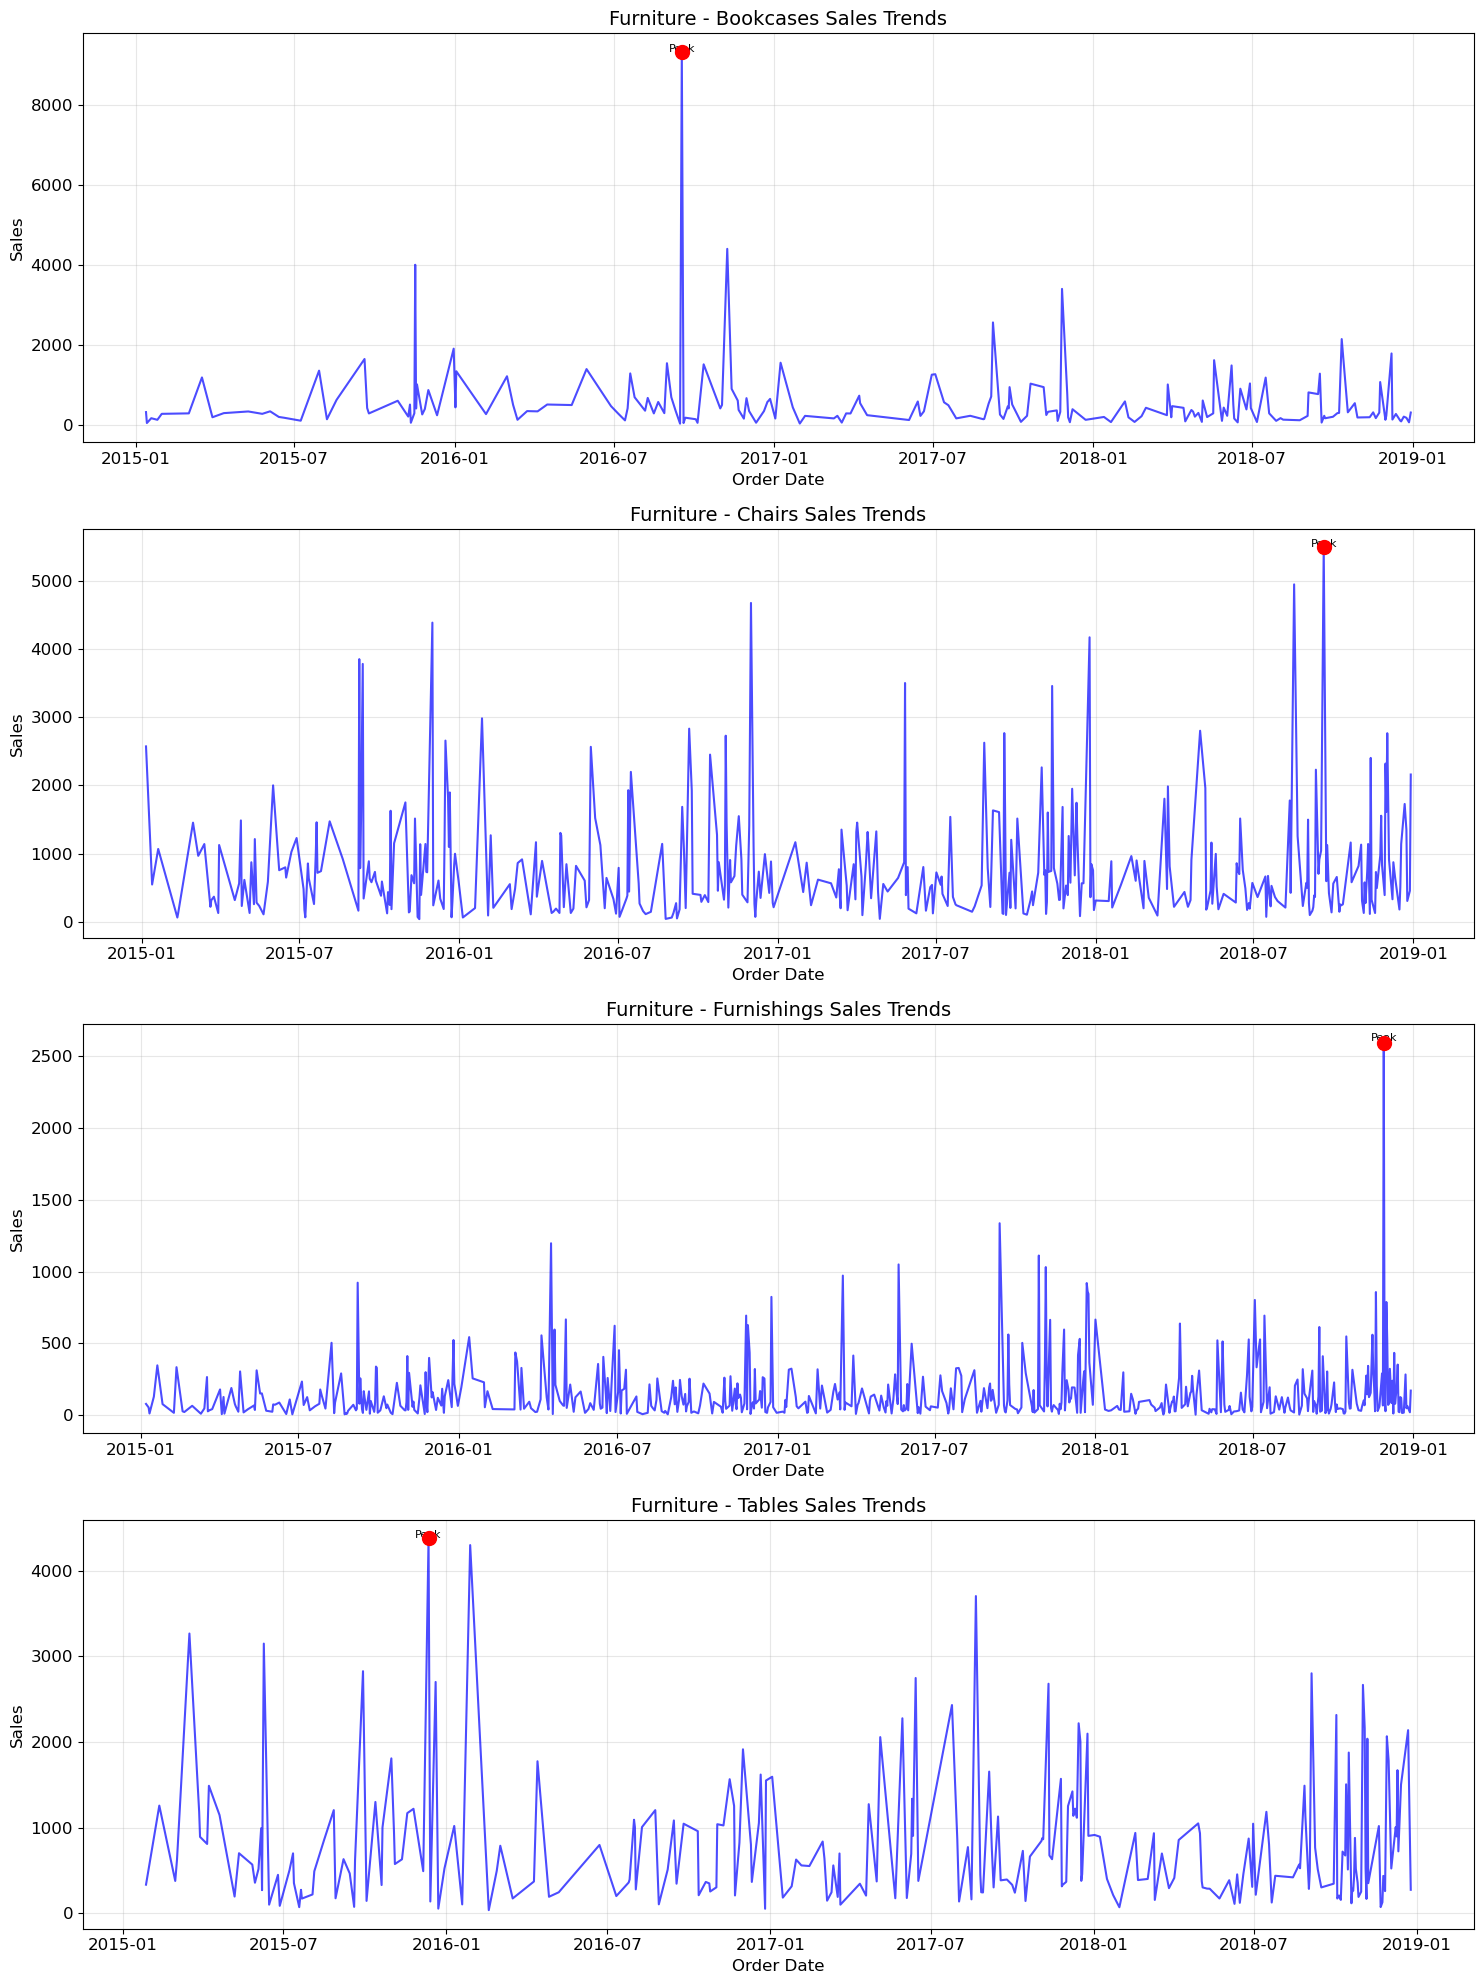

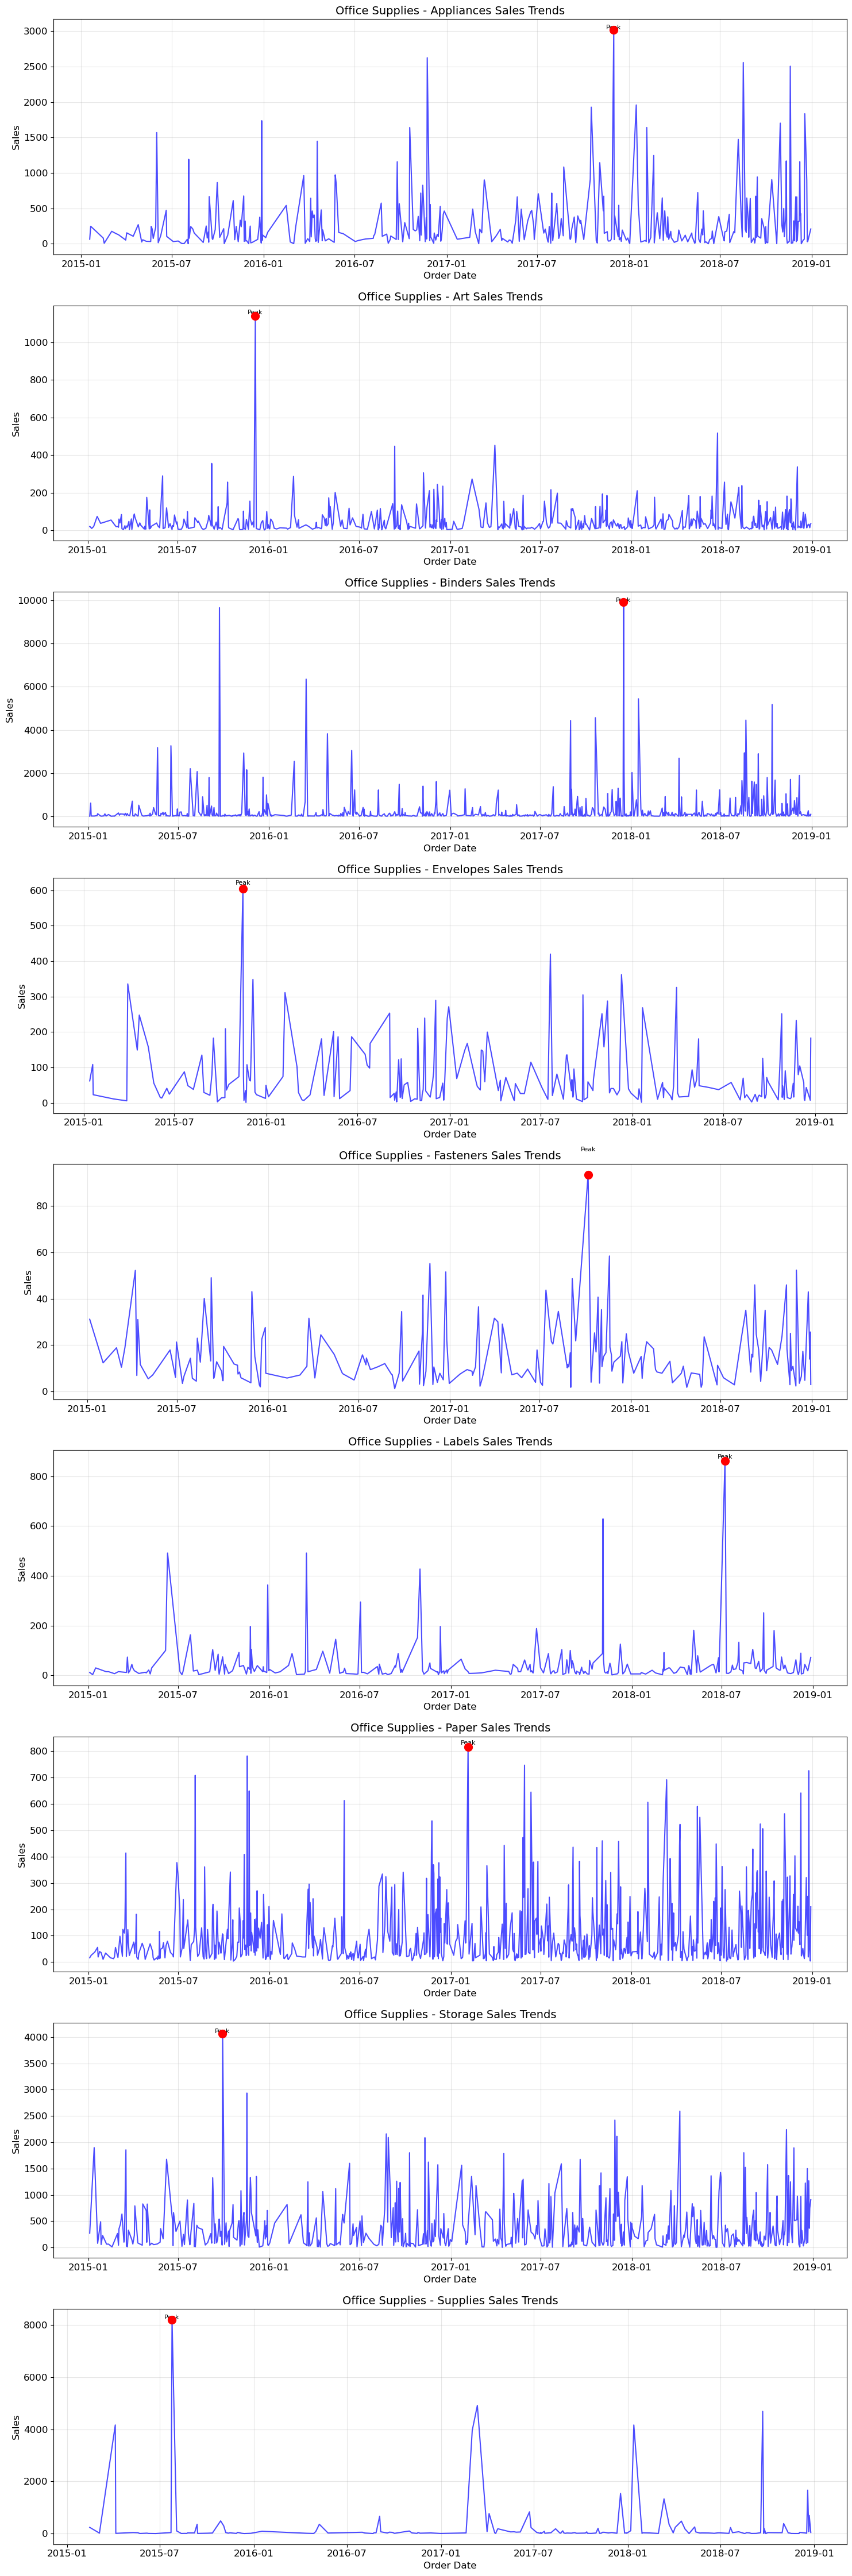

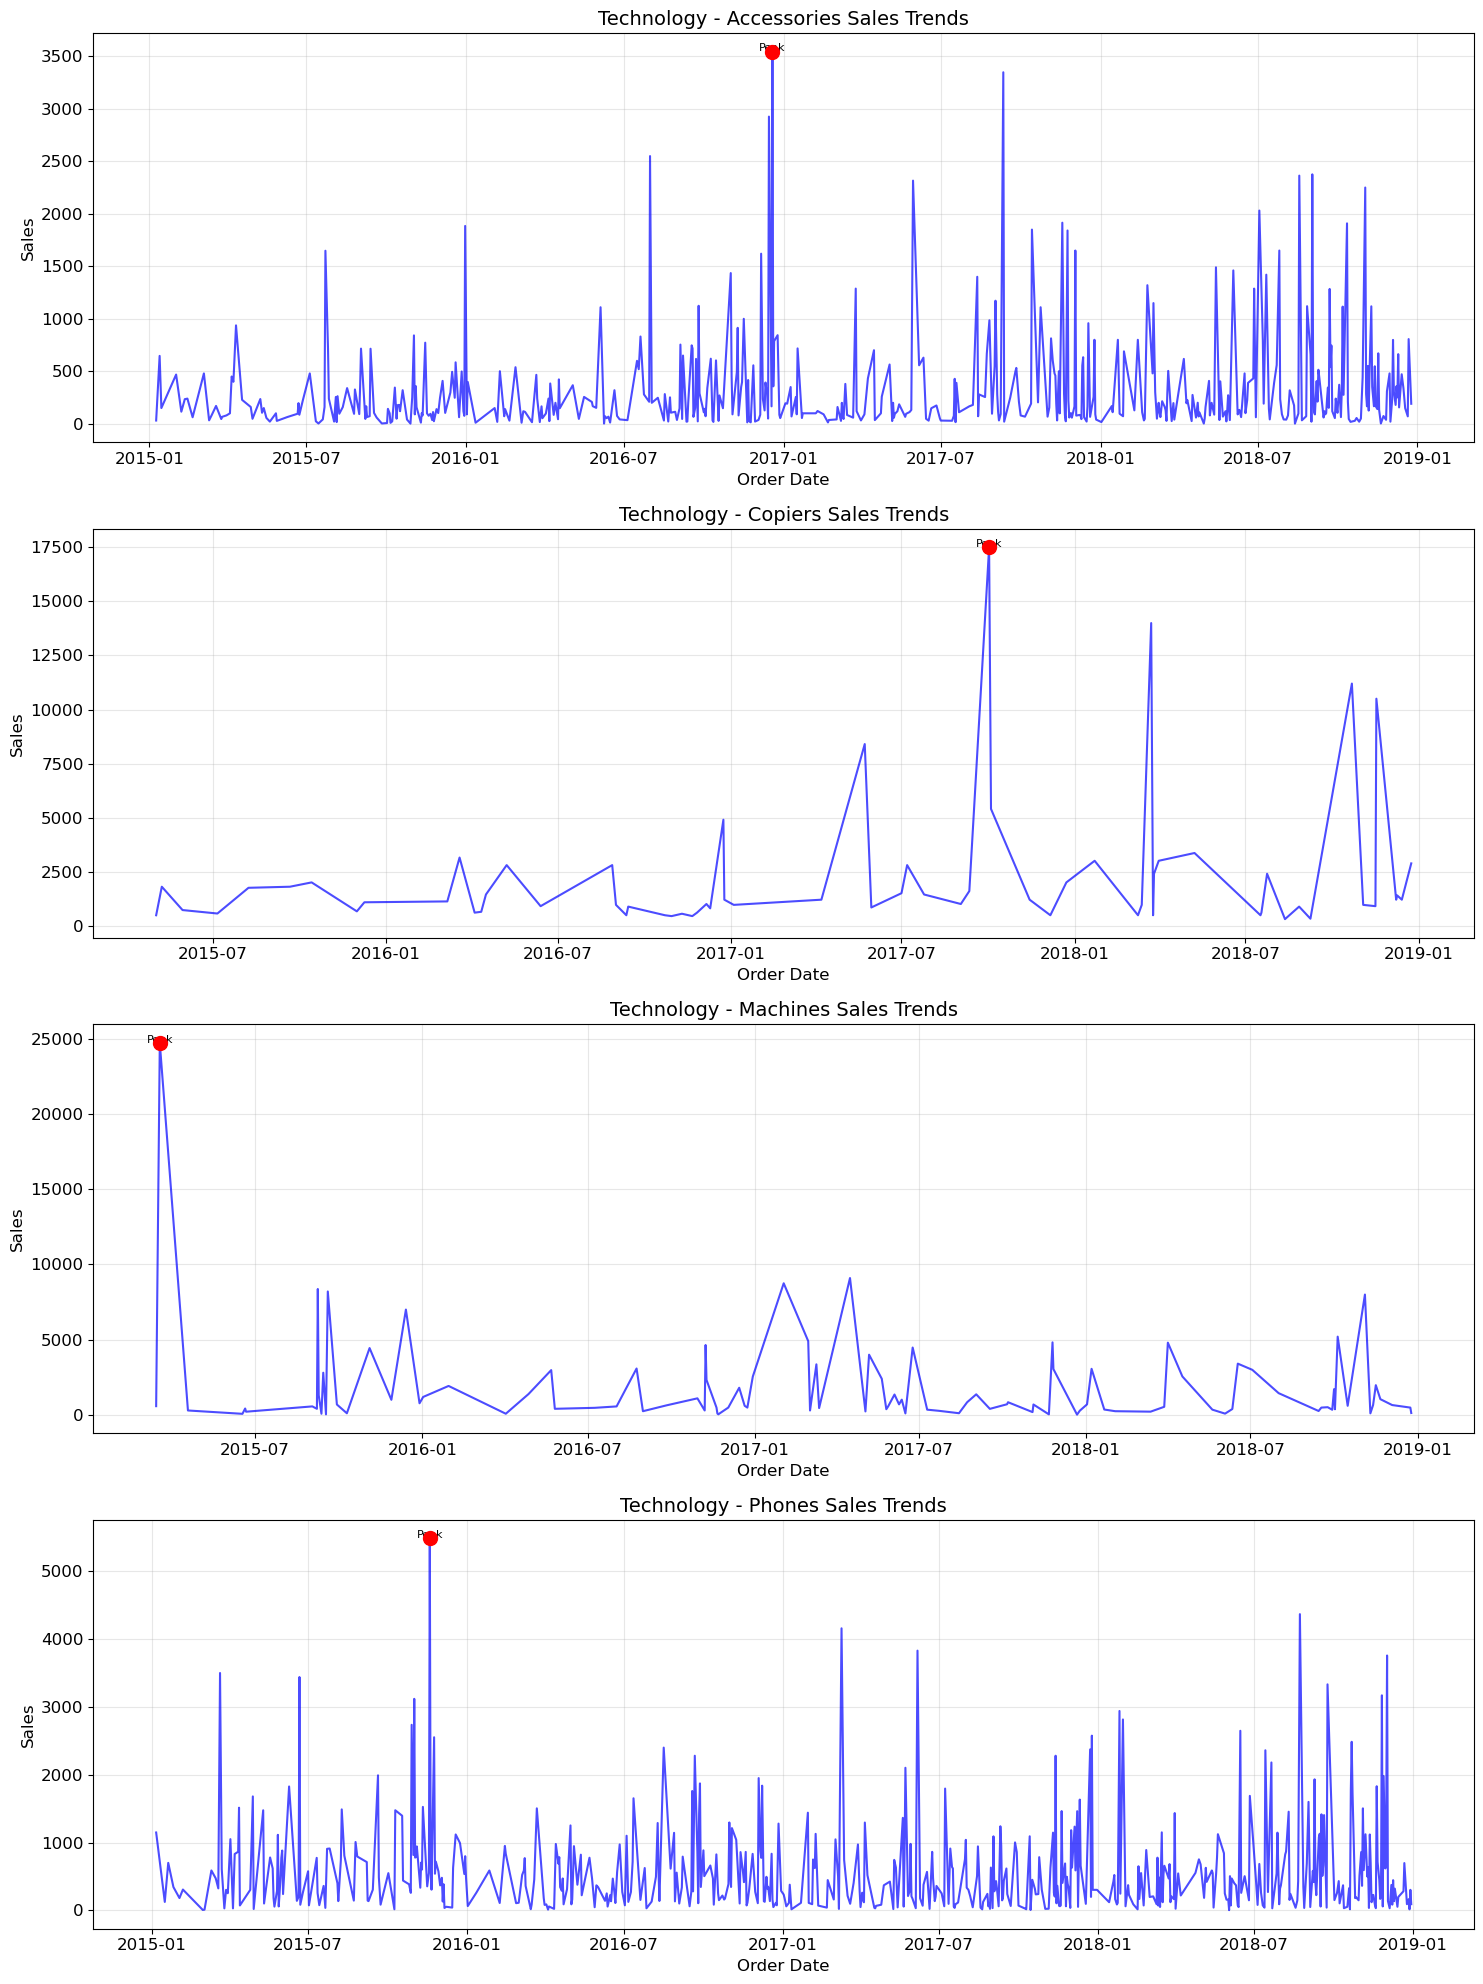

In [24]:


# Step 1: Data Preprocessing
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')  # Adjusted format to match day/month/year

# Sort the data by 'Order Date'
df.sort_values(by='Order Date', inplace=True)

# Handle missing values
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].median())

# Inspect column names
print("Columns in the dataset:", df.columns)

# Group data by Category, Sub-Category, and Order Date
grouped_data = df.groupby(['Category', 'Sub-Category', 'Order Date']).agg({
    'Sales': 'sum'
}).reset_index()

# Debugging: Check grouped data shape
print("Shape of grouped data:", grouped_data.shape)

# Step 2: Generate Separate Line Graphs for Each Category and Sub-Category
categories = grouped_data['Category'].unique()

for category in categories:
    # Filter data for the current category
    category_data = grouped_data[grouped_data['Category'] == category]
    subcategories = category_data['Sub-Category'].unique()
    
    # Create a new figure for the current category
    plt.figure(figsize=(15, len(subcategories) * 5))
    
    for i, subcategory in enumerate(subcategories, 1):
        # Filter data for the current sub-category
        subcategory_data = category_data[category_data['Sub-Category'] == subcategory]
        
        # Plot line graph for Sales over time
        plt.subplot(len(subcategories), 1, i)
        plt.plot(subcategory_data['Order Date'], subcategory_data['Sales'], label=subcategory, color='blue', alpha=0.7)
        
        # Highlight peaks (top 3 sales values)
        peak_date = subcategory_data.loc[subcategory_data['Sales'].idxmax(), 'Order Date']
        peak_sales = subcategory_data['Sales'].max()
        plt.scatter(peak_date, peak_sales, color='red', s=100, zorder=5)
        plt.text(peak_date, peak_sales + 10, f"Peak", fontsize=8, ha='center')
        
        plt.title(f"{category} - {subcategory} Sales Trends", fontsize=14)
        plt.xlabel("Order Date", fontsize=12)
        plt.ylabel("Sales", fontsize=12)
        plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()



=== Random Forest ===
✅ Best Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
📉 MSE: 1.52
📈 RMSE: 1.23
📊 R² Score: 0.42


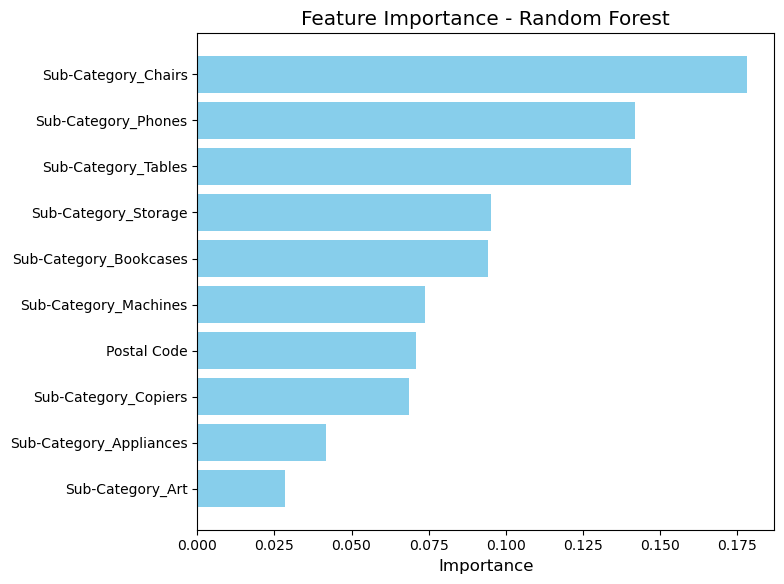

Top 10 Important Features:
                    Feature  Importance
13      Sub-Category_Chairs    0.178063
21      Sub-Category_Phones    0.141895
24      Sub-Category_Tables    0.140574
22     Sub-Category_Storage    0.095136
12   Sub-Category_Bookcases    0.094346
19    Sub-Category_Machines    0.073760
0               Postal Code    0.070751
14     Sub-Category_Copiers    0.068539
9   Sub-Category_Appliances    0.041778
10         Sub-Category_Art    0.028495

=== Gradient Boosting ===
✅ Best Params: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05}
📉 MSE: 1.41
📈 RMSE: 1.19
📊 R² Score: 0.46


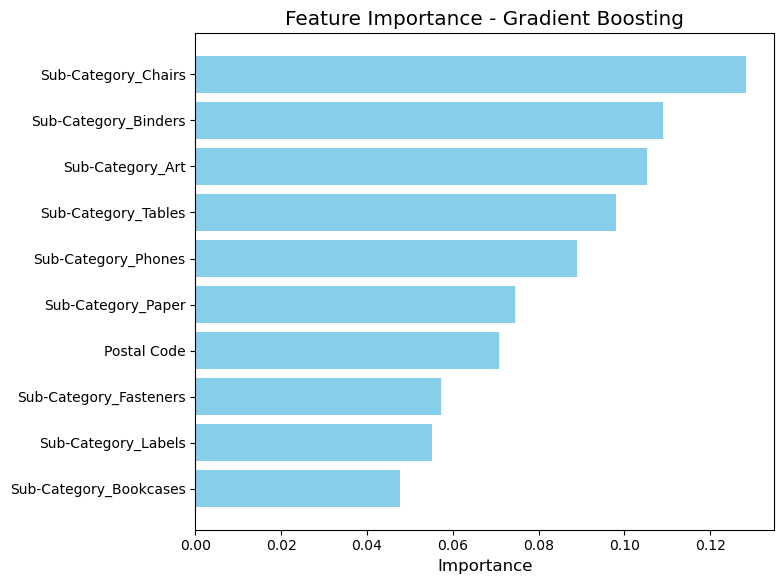

Top 10 Important Features:
                   Feature  Importance
13     Sub-Category_Chairs    0.128469
11    Sub-Category_Binders    0.109118
10        Sub-Category_Art    0.105340
24     Sub-Category_Tables    0.097992
21     Sub-Category_Phones    0.088971
20      Sub-Category_Paper    0.074550
0              Postal Code    0.070824
16  Sub-Category_Fasteners    0.057148
18     Sub-Category_Labels    0.055266
12  Sub-Category_Bookcases    0.047797

=== HistGradientBoosting ===
✅ Best Params: {'min_samples_leaf': 10, 'max_iter': 100, 'max_depth': None, 'learning_rate': 0.1, 'l2_regularization': 0.5}
📉 MSE: 1.40
📈 RMSE: 1.18
📊 R² Score: 0.46
⚠️  HistGradientBoosting does not support feature importance.

=== XGBoost ===
✅ Best Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
📉 MSE: 1.42
📈 RMSE: 1.19
📊 R² Score: 0.45


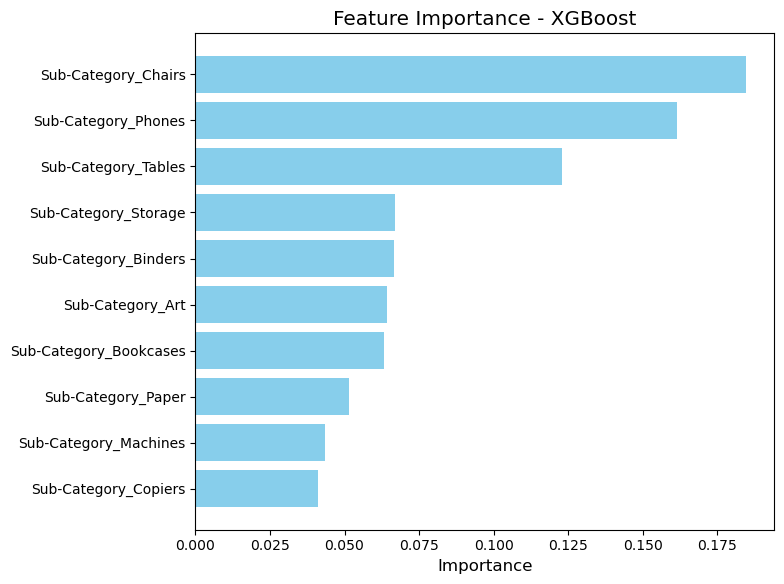

Top 10 Important Features:
                   Feature  Importance
13     Sub-Category_Chairs    0.184833
21     Sub-Category_Phones    0.161666
24     Sub-Category_Tables    0.122896
22    Sub-Category_Storage    0.067023
11    Sub-Category_Binders    0.066554
10        Sub-Category_Art    0.064226
12  Sub-Category_Bookcases    0.063241
20      Sub-Category_Paper    0.051578
19   Sub-Category_Machines    0.043458
14    Sub-Category_Copiers    0.041089

=== LightGBM ===
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 324
[LightGBM] [Info] Number of data points in the train set: 7840, number of used features: 25
[LightGBM] [Info] Start training from score 4.150609
[LightGBM] [Warning] No further splits wit

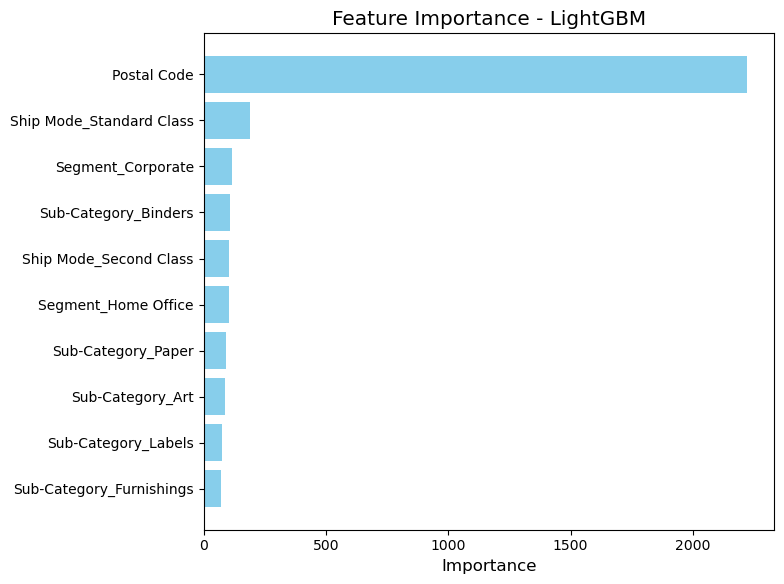

Top 10 Important Features:
                     Feature  Importance
0                Postal Code        2220
3   Ship Mode_Standard Class         190
4          Segment_Corporate         117
11      Sub-Category_Binders         107
2     Ship Mode_Second Class         103
5        Segment_Home Office         102
20        Sub-Category_Paper          91
10          Sub-Category_Art          87
18       Sub-Category_Labels          75
17  Sub-Category_Furnishings          73


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import lightgbm as lgb

# --- Data Preprocessing ---
# Columns to drop
columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 
                   'Product Name', 'Order Date', 'Ship Date', 'Country', 'City', 'State', 'Category']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Categorical columns to encode
categorical_cols = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']
categorical_cols = [col for col in categorical_cols if col in df.columns]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop any remaining non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df.drop(columns=non_numeric_cols, inplace=True)

# Separate features and target
X = df.drop(columns=['Sales'])
y = np.log1p(df['Sales'])  # Log-transform target to handle skewness

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)  # Retain column names for feature importance

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Models to Evaluate ---
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "LightGBM": lgb.LGBMRegressor(random_state=42)
}

# Hyperparameter grids for RandomizedSearchCV
param_grid = {
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0]
    },
    "HistGradientBoosting": {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_iter': [100, 200, 300],
        'max_depth': [None, 10],
        'min_samples_leaf': [10, 20, 50],
        'l2_regularization': [0.0, 0.1, 0.5]
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0]
    },
    "LightGBM": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'num_leaves': [31, 64, 128],
        'min_child_samples': [20, 30, 50]
    }
}

# --- Hyperparameter Tuning and Model Evaluation ---
best_models = {}
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Hyperparameter tuning using RandomizedSearchCV
    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_grid[name],
        n_iter=10,
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        random_state=42
    )
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    best_models[name] = best_model

    # Predict and evaluate
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"✅ Best Params: {random_search.best_params_}")
    print(f"📉 MSE: {mse:.2f}")
    print(f"📈 RMSE: {rmse:.2f}")
    print(f"📊 R² Score: {r2:.2f}")

    # Plot Feature Importance
    if hasattr(best_model, "feature_importances_"):
        importances = best_model.feature_importances_
    elif hasattr(best_model, "coef_"):
        importances = np.abs(best_model.coef_)
    else:
        print(f"⚠️  {name} does not support feature importance.")
        continue

    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Keep only top 10 features
    top_features = feature_importance_df.head(10)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f'Feature Importance - {name}')
    plt.xlabel('Importance')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

    # Print Top 10 Features
    print("Top 10 Important Features:")
    print(top_features)